<a href="https://colab.research.google.com/github/leenago/Projects/blob/master/KDX/MBN_%EB%89%B4%EC%8A%A4%EB%8D%B0%EC%9D%B4%ED%84%B0__%ED%98%84%EA%B2%BD_%EC%88%98%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/MBN 뉴스 데이터

/content/gdrive/Shared drives/청년취업아카데미_KDX한국데이터거래소/Data/MBN 뉴스 데이터


In [ ]:
# %cd C:\Users\ghk96\Desktop\KDX 데이터

In [ ]:
# %ls

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 3.8MB 41.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
from konlpy.tag import Okt
okt = Okt()
import re

In [ ]:
pd.options.mode.chained_assignment = None

#### 구글 드라이브 마운트

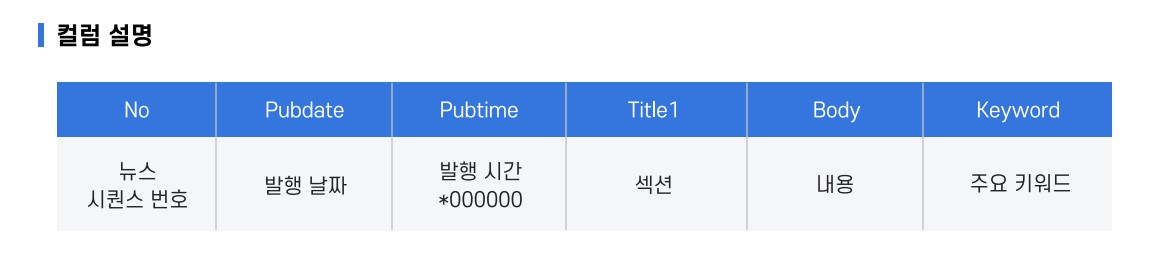

In [ ]:
#!pip install xlrd

In [ ]:
mk_news = pd.read_excel('mk_news_201901_202006.xlsx')
mk_news

,no,pubdate,pubtime,title1,body,keywords
0,2304119,20200312,0.0,사회일반,NaN,NaN
1,3937779,20190112,0.0,출판/도서,<!--[[--image0--]]//--> ◆ 야바위 게임 / 마이클 슈월비 지음...,"신간,소개"
2,3953320,20190101,0.0,테마기획,◆ 2019 경제기상도 / 부동산 ◆ \n <!--[[--image0--]]//--...,"ㅈ,ㅈ"
3,3953321,20190101,0.0,테마기획,◆ 2019 경제기상도 / 금리 ◆ \n <!--[[--image0--]]//-->...,"금리,경제기상도"
4,3953324,20190101,0.0,테마기획,<!--[[--image0--]]//--> '황금돼지해'인 2019년 기해년(己亥...,"경제,성장,경제기상도"
...,...,...,...,...,...,...
316819,4541564,20200630,225757.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN
316820,4541571,20200630,230932.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN
316821,4541579,20200630,231823.0,방송/TV,<!--[[--image0--]]//--> [매일경제 스타투데이 허은경 객원기자]...,NaN
316822,4541586,20200630,232907.0,방송/TV,<!--[[--image0--]]//--> \n[ 매일경제 스타투데이 서지경 객원...,NaN


In [ ]:
mk = mk_news.copy()

mk.columns

Index(['no', 'pubdate', 'pubtime', 'title1', 'body', 'keywords'], dtype='object')

In [ ]:
#내용 중복 제거
new_mk = mk.drop_duplicates(['title1','body'], keep='first', ignore_index = True)
len(new_mk)

297623

In [ ]:
#title1에 있는 카테고리는 총 174개
new_mk['title1'].unique()

array(['사회일반', '출판/도서', '테마기획', '의약/건강', '중견/중소기업', '증권계동향', '노동/노사',
       '경제일반', '문화산업', '공연/전시/음악', '신문/방송', '바둑', '기자24시', '매경칼럼', '사외칼럼',
       '인물/인터뷰', '인사', '사설', '아파트/분양', '신도시/토지', '유통·섬유·음식료', '외환·환율',
       '금융정책·일반', '카드·캐피털', '과학기술/특허', '사고/알림', '경기/지표', '정치일반', '해외증시',
       '채권/펀드', '국제금융', '국제경제', '국제산업', '국제정치', '항공·해운', '자동차', '기업 경영',
       '축구', '골프', '레저/관광', '기업정보', '남북관계', '외교·국방', '시세/시황', '법원·검찰·경찰',
       '교통/환경/날씨', '카툰', '핫이슈', '방송/TV', '가요', '사건·사고', '기타', '야구',
       '컴퓨터/정보통신', '무역/통상', nan, '세금', '국제사회', '전기·전자·통신', '국제사건/사고',
       'Economy', '헬스저널', '기업일반·재계동향', '교육', '건설업계 동향', '보건/복지', 'Seoul',
       '스포츠(기타)', '중공업·기계·금속', '지역경제', '부음', '행정·지자체', '취업/채용', '공시',
       '은행', '상가/오피스텔', '보험', '시황', '칼럼', '창업', 'Asia', 'Market',
       'CONSUMER JOURNAL', '저축은행·기타', '포토', 'Biz', '세제/정책', '화학·에너지',
       'Cover Story', 'Review&Observation', 'Photos', '벤쳐/벤쳐캐피탈',
       '재개발/재건축', '증권정책', '당좌거래 정지', '영화', 'THE BIZ TIMES',
       'Money & Rich

In [ ]:
new_mk.isnull().sum()

no               0
pubdate          0
pubtime          1
title1        9541
body             2
keywords    141268
dtype: int64

### 데이터 정제

In [ ]:
#모든 body에 대해 정규화 진행
news_sub = []

for i in range(len(new_mk)):
  news_sub.append(re.sub('[^ㄱ-힣A-Z]',' ', str(new_mk['body'][i])))

new_mk['정규화'] = news_sub

In [ ]:
new_mk['정규화'][15]

#new_mk는 정규화만 된 상태

'       경제기상도                             스마트폰과 TV 등 전자 제품의 핵심 부품인 디스플레이는     년 양극화가 가속화될 전망이다  액정표시장치 LCD 는 공급과잉으로 시장이 포화 상태에 이를 것으로 보이는 데 비해 유기발광다이오드 OLED 는 당분간 성장세를 이어갈 것으로 예상된다  LCD 시장은 중국이 이미 패권을 잡은 상태다  중국은  제조       기치 아래 그동안 양산 규모를 대폭 늘려오고 있다  특히 중국 정부 지원에 힘입어 BOE는 TV용 LCD 패널 세계  위 자리를 차지한 상태다  시장조사기관 DSCC에 따르면 중국 정부는     년까지     억달러를 반도체 디스플레이에 지원할 예정이다  BOE가 시설과 연구개발에 투자한 자금 중    는 정부 보조금이었다      년 BOE는 물론 차이나스타 CSOT  등이 양산을 더욱 늘릴 것으로 예상된다  LCD 패널 가격이 하락세에서 벗어나지 못할 요인이다  시장조사기관 위츠뷰에 따르면     년  분기 평균   인치 LCD 패널 값은      하락한   달러를 기록했다  또   인치 대형 패널도      떨어진    달러로 집계됐다  LCD 패널 값 하락은     년에도 이어질 전망이다  반면     년 OLED 시장은 TV 대형화와 스마트폰 고급화에 맞물려 성장세가 예상된다  유비리서치에 따르면 OLED 시장은     년    억달러에서     년    억달러로 성장한 뒤     년    억달러로 늘어날 전망이다  특히 OLED는 LCD에 비해 기술 장벽이 아직은 높아 모바일 패널은 삼성디스플레이  TV 패널은 LG디스플레이가 주도권을 쥐고 있다  따라서 삼성디스플레이와 LG디스플레이는 OLED 전환에 박차를 가해 중국 업체들과 격차를 확대할 것으로 예상되다  LG디스플레이는 OLED 매출 비중을 현재    에서 향후    까지 끌어올린다는 계획을 갖고 있다  현재 경기 파주 E  E 라인    세대 에서 OLED 패널을 월  만여 장 원판 기준  생산하고 

### 해당 키워드와 맞는 기사 찾아내기 ('신선식품'을 예시로)

In [ ]:
#해당 단어가 포함된 기사 추출하는 함수
def select_news(신선식품):
  word_include = new_mk[new_mk['정규화'].str.contains(신선식품)].reset_index()
  useless_title = ['가요','건강','골프','국제사건/사고','국제사회','국회','남북관계','노동/노사','당좌거래 정지','라이프','미국/중남미','바둑','방송/TV','법원·검찰·경찰','보안/해킹','부음','사고/알림','소비생활','스페셜 리포트','신문사-포토','신설법인','여행','연예','영화','외환·환율','요약뉴스','인사','전시','증시지표','출판/도서','카툰','특허','패션','포토','핫이슈']
  p = word_include[~word_include['title1'].isin(useless_title)].reset_index()
  return p

In [ ]:
#토큰화
tokenize_news = []

for i in range(len(select_news('신선식품'))):
  tokenize_news.append(okt.morphs(select_news('신선식품')['정규화'][i]))


In [ ]:
df = select_news('신선식품')
df['토큰화'] = tokenize_news
df

,level_0,index,no,pubdate,pubtime,title1,body,keywords,정규화,토큰화
0,0,1348,3956911,20190103,104033.0,유통·섬유·음식료,<!--[[--image0--]]//--> 지난해 '블랙이오' 행사를 흥행시켰던 ...,"이마트,신세계,전복이 990원,국민 가격 프로젝트,신세계만의 스마트한 초저가모델",지난해 블랙이오 행사를 흥행시켰던 ...,"[지난해, 블랙, 이오, 행사, 를, 흥행, 시켰던, 이마트, 가, 올해, 는, 더..."
1,1,1480,3957189,20190103,143430.0,People,대부분의 질문에 대한 답이 ‘회사가 추구하는 가치’에 대한 설명으로 이어졌다. 인...,NaN,대부분의 질문에 대한 답이 회사가 추구하는 가치 에 대한 설명으로 이어졌다 인...,"[대부분, 의, 질문, 에, 대한, 답, 이, 회사, 가, 추구, 하는, 가치, 에..."
2,2,1639,3957470,20190104,0.0,유통·섬유·음식료,온라인 쇼핑 공세에 맞선 이마트가 '신선식품 특가' 카드를 꺼내들었다. 온라인 쇼핑...,"이마트,가격",온라인 쇼핑 공세에 맞선 이마트가 신선식품 특가 카드를 꺼내들었다 온라인 쇼핑...,"[온라인, 쇼핑, 공세, 에, 맞선, 이마트, 가, 신선, 식품, 특, 가, 카드,..."
3,3,1915,3958078,20190104,93053.0,NaN,[숫자로 보는 세상] \n <!--[[--image0--]]//--> ◆4036억9...,NaN,숫자로 보는 세상 억 ...,"[숫자, 로, 보는, 세상, 억, 만, 달러, 우리나라, 외환, 보유, 액, 이, ..."
4,4,2025,3958307,20190104,101910.0,유통·섬유·음식료,2019년 배송시장의 핵심 트렌드는 더 빠르고 간편한 배송 서비스가 될 것으로 보인...,NaN,년 배송시장의 핵심 트렌드는 더 빠르고 간편한 배송 서비스가 될 것으로 보인...,"[년, 배송, 시장, 의, 핵심, 트렌드, 는, 더, 빠르고, 간편한, 배송, 서비..."
...,...,...,...,...,...,...,...,...,...,...
537,542,296000,4538517,20200629,0.0,백화점/마트,<!--[[--image0--]]//--> 지난 26일 시작한 '대한민국 동행세일...,"백화점,마트,동행세일",지난 일 시작한 대한민국 동행세일...,"[지난, 일, 시작, 한, 대한민국, 동행, 세, 일, 덕, 에, 백화점, 과, 대..."
538,543,296267,4539020,20200630,0.0,테마기획,◆ 위기속 상생 경영 ◆\n <!--[[--image0--]]//--> 롯데는 최근...,"롯데,특집",위기속 상생 경영 롯데는 최근 ...,"[위기, 속, 상생, 경영, 롯데, 는, 최근, 복지, 시설, 과, 위탁가정, 싱글..."
539,544,296688,4539641,20200629,150556.0,비즈니스,코로나19 사태의 가장 큰 피해자 중 하나는 자영업자다. 감염 우려로 매장을 방문하...,NaN,코로나 사태의 가장 큰 피해자 중 하나는 자영업자다 감염 우려로 매장을 방문하...,"[코로나, 사태, 의, 가장, 큰, 피해자, 중, 하나, 는, 자영, 업자, 다, ..."
540,545,297248,4540562,20200630,111913.0,유통·섬유·음식료,<!--[[--image0--]]//--> 홈플러스는 자사 창고형 스페셜 매장의 ...,"홈플러스 더 클럽,창고형 스페셜 매장,홈플러스,모바일",홈플러스는 자사 창고형 스페셜 매장의 ...,"[홈플러스, 는, 자사, 창고, 형, 스페셜, 매장, 의, 온라인, 몰, 더, 클럽..."


In [ ]:
#postagging - 토큰화에 붙이는게 아니라 정규화에 붙였어야 했음
oktTag = []

for i in range(len(df)):
    oktTag.append(okt.pos(df['정규화'][i]))
    
df['Tag'] = oktTag

In [ ]:
df['Tag'][0]

[('지난해', 'Noun'),
 ('블랙', 'Noun'),
 ('이오', 'Noun'),
 ('행사', 'Noun'),
 ('를', 'Josa'),
 ('흥행', 'Noun'),
 ('시켰던', 'Verb'),
 ('이마트', 'Noun'),
 ('가', 'Josa'),
 ('올해', 'Noun'),
 ('는', 'Josa'),
 ('더', 'Noun'),
 ('파격', 'Noun'),
 ('적', 'Suffix'),
 ('인', 'Josa'),
 ('가격', 'Noun'),
 ('으로', 'Josa'),
 ('오프라인', 'Noun'),
 ('점포', 'Noun'),
 ('경쟁력', 'Noun'),
 ('강화', 'Noun'),
 ('에', 'Josa'),
 ('나선다', 'Verb'),
 ('단순히', 'Adjective'),
 ('가격', 'Noun'),
 ('만', 'Josa'),
 ('낮춘다는', 'Verb'),
 ('의미', 'Noun'),
 ('보다는', 'Josa'),
 ('유통', 'Noun'),
 ('구조', 'Noun'),
 ('개선', 'Noun'),
 ('을', 'Josa'),
 ('통해', 'Noun'),
 ('신세계', 'Noun'),
 ('만의', 'Josa'),
 ('스마트', 'Noun'),
 ('한', 'Josa'),
 ('초', 'Noun'),
 ('저가', 'Noun'),
 ('모델', 'Noun'),
 ('을', 'Josa'),
 ('만들어', 'Verb'),
 ('소비자', 'Noun'),
 ('들', 'Suffix'),
 ('을', 'Josa'),
 ('오프라인', 'Noun'),
 ('매장', 'Noun'),
 ('으로', 'Josa'),
 ('이끌겠다는', 'Verb'),
 ('복안', 'Noun'),
 ('이다', 'Josa'),
 ('일', 'Noun'),
 ('이마트', 'Noun'),
 ('는', 'Josa'),
 ('년', 'Noun'),
 ('새해', 'Noun'),
 ('첫', 'Noun'),
 (

In [ ]:
#불용어처리
stopPos = ['Josa', 'Determiner','Adverb','Suffix','Modifier','Adverb']
stopword = pd.read_csv('stopword_korean.csv')
new_stopword = stopword.drop(columns='Unnamed: 0')

In [ ]:
# import itertools
# flattened = list(itertools.chain.from_iterable(oktTag)) ; flattened[1][0]
# len(flattened)

In [ ]:
df['Tag'][0]

[('지난해', 'Noun'),
 ('블랙', 'Noun'),
 ('이오', 'Noun'),
 ('행사', 'Noun'),
 ('를', 'Josa'),
 ('흥행', 'Noun'),
 ('시켰던', 'Verb'),
 ('이마트', 'Noun'),
 ('가', 'Josa'),
 ('올해', 'Noun'),
 ('는', 'Josa'),
 ('더', 'Noun'),
 ('파격', 'Noun'),
 ('적', 'Suffix'),
 ('인', 'Josa'),
 ('가격', 'Noun'),
 ('으로', 'Josa'),
 ('오프라인', 'Noun'),
 ('점포', 'Noun'),
 ('경쟁력', 'Noun'),
 ('강화', 'Noun'),
 ('에', 'Josa'),
 ('나선다', 'Verb'),
 ('단순히', 'Adjective'),
 ('가격', 'Noun'),
 ('만', 'Josa'),
 ('낮춘다는', 'Verb'),
 ('의미', 'Noun'),
 ('보다는', 'Josa'),
 ('유통', 'Noun'),
 ('구조', 'Noun'),
 ('개선', 'Noun'),
 ('을', 'Josa'),
 ('통해', 'Noun'),
 ('신세계', 'Noun'),
 ('만의', 'Josa'),
 ('스마트', 'Noun'),
 ('한', 'Josa'),
 ('초', 'Noun'),
 ('저가', 'Noun'),
 ('모델', 'Noun'),
 ('을', 'Josa'),
 ('만들어', 'Verb'),
 ('소비자', 'Noun'),
 ('들', 'Suffix'),
 ('을', 'Josa'),
 ('오프라인', 'Noun'),
 ('매장', 'Noun'),
 ('으로', 'Josa'),
 ('이끌겠다는', 'Verb'),
 ('복안', 'Noun'),
 ('이다', 'Josa'),
 ('일', 'Noun'),
 ('이마트', 'Noun'),
 ('는', 'Josa'),
 ('년', 'Noun'),
 ('새해', 'Noun'),
 ('첫', 'Noun'),
 (

In [ ]:
#불용어처리 된 것
word = []

for tag in df:
    if tag[1] not in stopPos:
        if tag[0] not in new_stopword:
            word.append(tag[0])
            
word

['l', 'i', 'n', 'p', 'p', 't', 'b', 'k', '정', '토', 'T']

In [ ]:
df['Tag'][541][0]

('스마트', 'Noun')

In [ ]:
#불용어처리 된 것
word = []

for i in range(len(df['Tag'])):
    for tag in df['Tag'][i]:
      if tag[1] not in stopPos:
        if tag[0] not in stopword:
          word.append(tag[0])
            
word[1]

'블랙'

In [ ]:
detokenize = []

for token in word:
  t=' '.join(token)
  detokenize.append(t)

detokenize

['지 난 해',
 '블 랙',
 '이 오',
 '행 사',
 '흥 행',
 '시 켰 던',
 '이 마 트',
 '올 해',
 '더',
 '파 격',
 '가 격',
 '오 프 라 인',
 '점 포',
 '경 쟁 력',
 '강 화',
 '나 선 다',
 '단 순 히',
 '가 격',
 '낮 춘 다 는',
 '의 미',
 '유 통',
 '구 조',
 '개 선',
 '통 해',
 '신 세 계',
 '스 마 트',
 '초',
 '저 가',
 '모 델',
 '만 들 어',
 '소 비 자',
 '오 프 라 인',
 '매 장',
 '이 끌 겠 다 는',
 '복 안',
 '일',
 '이 마 트',
 '년',
 '새 해',
 '첫',
 '프 로 젝 트',
 '새 로 운',
 '가 격',
 '정 책',
 '국 민',
 '가 격',
 '실 시',
 '한 다 고',
 '밝 혔 다',
 '장 바 구 니',
 '물 가',
 '큰',
 '영 향',
 '미 치 는',
 '신 선',
 '식 품',
 '생 활 필 수 품',
 '가 격',
 '파 격',
 '내 리 겠 다 는',
 '의 도',
 '이 마 트',
 '따 르 면',
 '매 월',
 '주',
 '차',
 '농',
 '수',
 '축 산',
 '식 품',
 '각 각',
 '개',
 '선 정',
 '해',
 '주 일',
 '동 안',
 '할 인',
 '해',
 '판 매',
 '한 다',
 '국 민',
 '가 격',
 '프 로 젝 트',
 '첫',
 '상 품',
 '전 복',
 '소',
 '삼 겹 살',
 '계 란',
 '해 당',
 '기 간',
 '전 복',
 '경 우',
 '행 사',
 '카 드',
 '결 제',
 '하 면',
 '정 상',
 '가 보 다',
 '할 인',
 '개 당',
 '원',
 '살',
 '수',
 '있 다',
 '인 당',
 '구 매',
 '마 리',
 '제 한',
 '된 다',
 '전 복',
 '중',
 '대',
 '팩',
 '상 품',
 '만',
 '원',
 '판 매',
 '한 다',
 '삼 겹 살',
 '목'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidv = TfidfVectorizer
tfidv = tfidv.fit(word)
tfidv.transform(word).toarray()

TypeError: ignored

In [ ]:
# from collections import defaultdict

# word2id = defaultdict(lambda : len(word2id))

# for doc in word:
#     word2id[doc]

# word2id

In [ ]:
for i, doc in enumerate(word):
    for token in doc:
        DTM[i, word2id[token]] += 1
    
DTM